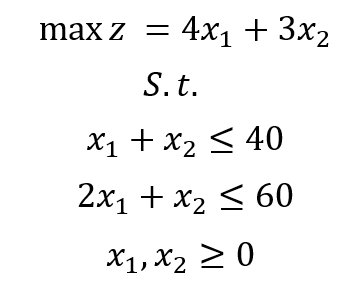

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

**Example**

In [ ]:
#Define the objective function
def objective_function(x1,x2):
  return 4*x1 + 3*x2

#Define Constraints
def constraint1(x1,x2):
  return x1+x2<=40

def constraint2(x1,x2):
  return 2*x1+x2<=60

**Genetic Algorithm Function**

In [ ]:
def genetic_algorithm(population_size,num_generation):

  # Initialization
  population = []
  fitness_history = []

  for i in range(population_size):
    x1 = random.uniform(0,40)
    x2 = random.uniform(0,60)
    population.append((x1,x2))

  best_solution = None
  best_fitness = float('-inf')

  for generation in range(num_generation):
    #Evaluation
    fitness = [objective_function(x1,x2) for x1, x2 in population]

    feasible_population = [individual for individual in population if 
                          constraint1(individual[0], individual[1]) and constraint2(individual[0], individual[1])]

    #Selection
    if feasible_population:
      feasible_fitness = [objective_function(x1,x2) for x1, x2 in feasible_population]
      parents = random.choices(feasible_population,weights=feasible_fitness,k=population_size)
    else:
      parents = []
      while len(parents)<population_size:
        potential_parents = random.choice(population,weights=fitness)
        if constraint1(potential_parents[0],potential_parents[1]) and constraint2(potential_parents[0],potential_parents[1]):
          parents.append(potential_parents)
    

    #Crossover
    offspring = []
    for i in range(population_size):
      parent1,parent2 = random.choices(parents,k=2)
      x1_child = random.uniform(min(parent1[0],parent2[0]),max(parent1[0],parent2[0]))
      x2_child = random.uniform(min(parent1[1],parent2[1]),max(parent1[1],parent2[1]))
      offspring.append((x1_child,x2_child))
######################### 
#Parent1: (x1=10 , x2=5)
#Parent2: (x1=20 , x2=15)
#The minimum value is min(parent1[0],parent2[0]) = min(10,20) = 10
#The Maximum value is max(parent1[0],parent2[0]) = max(10,20) = 20
#random.uniform(10,20)    x1_child = 17
#The minimum value is min(parent1[1],parent2[1]) = min(5,15) = 5
#The Maximum value is max(parent1[1],parent2[1]) = max(5,15) = 15
#random.uniform(5,15)    x2_child = 11
#offspring: (x1=17,x2=11)
#########################
  
    #Mutation
    mutation_rate = 1/(generation+1) #Dynamic mutation rate
    for i in range(population_size):
      if random.random()<mutation_rate:
        offspring[i] = (random.uniform(0,40),random.uniform(0,60))

#mutation_rate = 1/(1+1) = 0.5
#random.random() = 0.75
# No mutations occur

#random.random() = 0.2 < mutation_rate(0.5)
#New values for the offspring after mutation (new_x1, new_x2)

# Beginning - Exploration - High mutation rate
# Later generations - Exploitation - Low mutation rate

    #Elitism
    if best_solution is not None:
      offspring[0] = best_solution

    population = offspring

    #Find the best feasible solution
    feasible_solutions = [(x1,x2) for (x1,x2) in population if constraint1(x1,x2) and constraint2(x1,x2)]
    if feasible_solutions:
      best_solution = max(feasible_solutions,key=lambda x: objective_function(x[0],x[1]))
      best_fitness = objective_function(best_solution[0],best_solution[1])
    fitness_history.append(best_fitness)

    print(f"Generation{generation+1}: Best solution = {best_solution},Best fitness = {best_fitness}")

  #Plot the fitness progress
  plt.plot(range(1,num_generation+1),fitness_history)
  plt.xlabel("Generation")
  plt.ylabel("Best Fitness")
  plt.title("GA - Fitness Progress")
  plt.show()

  return best_solution,best_fitness


**Call the GA Function**

Generation1: Best solution = (19.96565354511436, 19.471796712894218),Best fitness = 138.2780043191401
Generation2: Best solution = (19.96565354511436, 19.471796712894218),Best fitness = 138.2780043191401
Generation3: Best solution = (19.96565354511436, 19.471796712894218),Best fitness = 138.2780043191401
Generation4: Best solution = (19.96565354511436, 19.471796712894218),Best fitness = 138.2780043191401
Generation5: Best solution = (20.255572416393434, 19.3813955321761),Best fitness = 139.16647626210204
Generation6: Best solution = (20.255572416393434, 19.3813955321761),Best fitness = 139.16647626210204
Generation7: Best solution = (20.255572416393434, 19.3813955321761),Best fitness = 139.16647626210204
Generation8: Best solution = (20.255572416393434, 19.3813955321761),Best fitness = 139.16647626210204
Generation9: Best solution = (20.255572416393434, 19.3813955321761),Best fitness = 139.16647626210204
Generation10: Best solution = (20.255572416393434, 19.3813955321761),Best fitness 

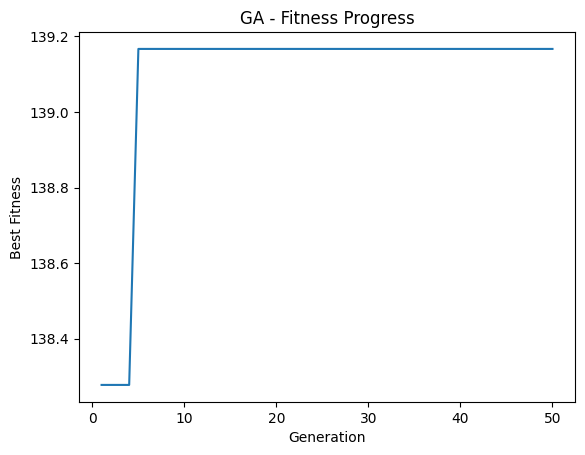

Final best solution: (20.255572416393434, 19.3813955321761)
Final best fitness: 139.16647626210204


In [ ]:
population_size = 10000
num_generation = 50

best_solution,best_fitness = genetic_algorithm(population_size,num_generation)

if best_solution is not None:
  print("Final best solution:", best_solution)
  print("Final best fitness:", best_fitness)
else:
  print("No feasible solution found within the given constraints")